In [1]:
import os
import pandas as pd

# Directory where the CSV files are stored
dir_path = "./Data/VestaData/AccCalcDicts/ErrorTables"

# Get a list of all the CSV files in that directory
csv_files = [f for f in os.listdir(dir_path) if f.endswith('.csv')]

# Create a dictionary of dataframes
dfs = {}

for csv_file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(os.path.join(dir_path, csv_file))
    
    # Store the DataFrame in the dictionary
    dfs[csv_file] = df


In [2]:
for filename in list(dfs.keys()):
    print(filename)


vesta-0758-30.fit.csv
vesta-0803-30.fit.csv
vesta-0808-30.fit.csv
vesta-0813-30.fit.csv
vesta-0818-30.fit.csv
vesta-0823-30.fit.csv
vesta-0828-30.fit.csv
vesta-0831-10.fit.csv
vesta-0833-30.fit.csv
vesta-0835-10.fit.csv
vesta-0838-10.fit.csv
vesta-0841-10.fit.csv
vesta-0844-10.fit.csv
vesta-0847-10.fit.csv
vesta-0850-10.fit.csv
vesta-0853-10.fit.csv
vesta-0858-10.fit.csv


In [3]:
# Separate the filenames into two lists
files_30 = [filename for filename in dfs.keys() if filename.endswith('-30.fit.csv')]
files_10 = [filename for filename in dfs.keys() if filename.endswith('-10.fit.csv')]


In [4]:
def calculate_stats(dfs, files):
    # Initialize the dictionaries to store the results
    results = {
        "pixel_error_twirl": {},
        "ra_dec_error_twirl": {},
        "pixel_error_sip": {},
        "ra_dec_error_sip": {},
        #"pixel_error_web_astro": {},
        #"ra_dec_error_web_astro": {},
        "pixel_error_manual": {},
        "ra_dec_error_manual": {},
    }

    # Loop through each file in files
    for filename in files:
        # Get the DataFrame for the current file
        df = dfs[filename]
        
        # Loop through each column in the DataFrame
        for column in df.columns:
            # Calculate statistics
            stats = {
                'mean': df[column].mean(),
                'min': df[column].min(),
                'max': df[column].max(),
                'median': df[column].median(),
                'std_dev': df[column].std()
            }

            # Determine which dictionary to update based on the column name
            if "Pixel Error WCS Method Twirl" in column:
                results["pixel_error_twirl"][filename] = stats
            elif "RA/Dec Error WCS Method Twirl" in column:
                results["ra_dec_error_twirl"][filename] = stats
            elif "Pixel Error WCS Method SIP" in column:
                results["pixel_error_sip"][filename] = stats
            elif "RA/Dec Error WCS Method SIP" in column:
                results["ra_dec_error_sip"][filename] = stats
            #elif "Pixel Error WCS Method Web_Astro" in column:
            #    results["pixel_error_web_astro"][filename] = stats
            #elif "RA/Dec Error WCS Method Web_Astro" in column:
            #    results["ra_dec_error_web_astro"][filename] = stats
            elif "Pixel Error WCS Method Manual" in column:
                results["pixel_error_manual"][filename] = stats
            elif "RA/Dec Error WCS Method Manual" in column:
                results["ra_dec_error_manual"][filename] = stats

    return results

results_30 = calculate_stats(dfs, files_30)
results_10 = calculate_stats(dfs, files_10)



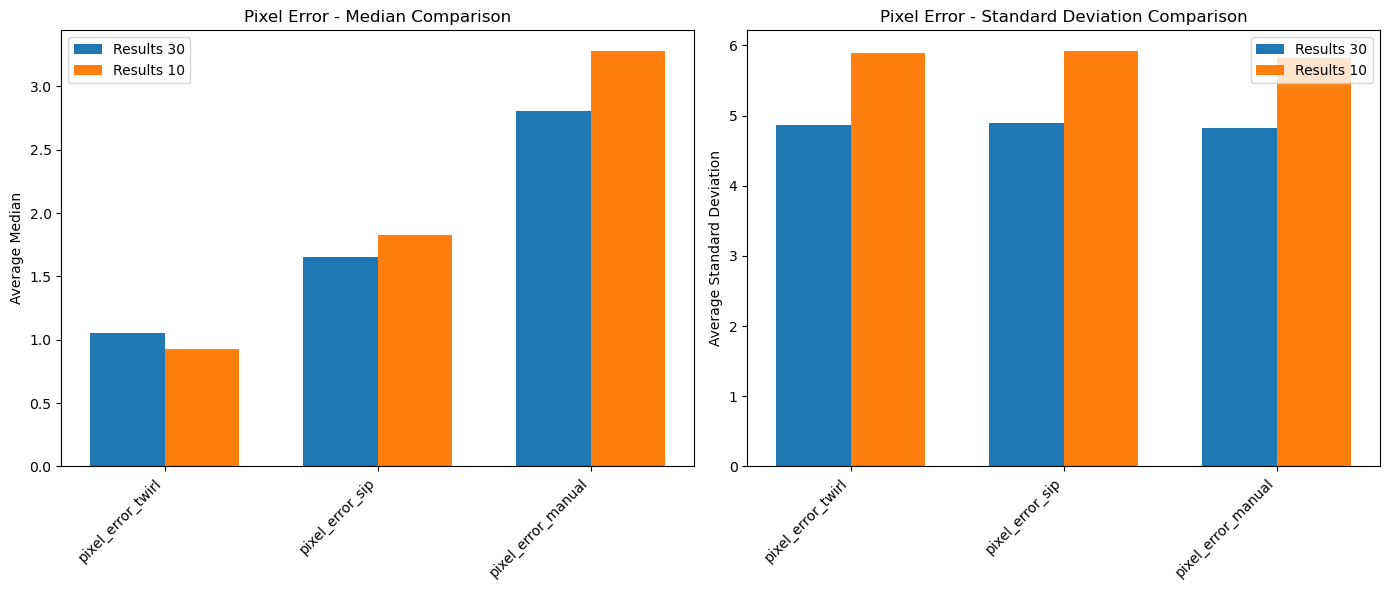

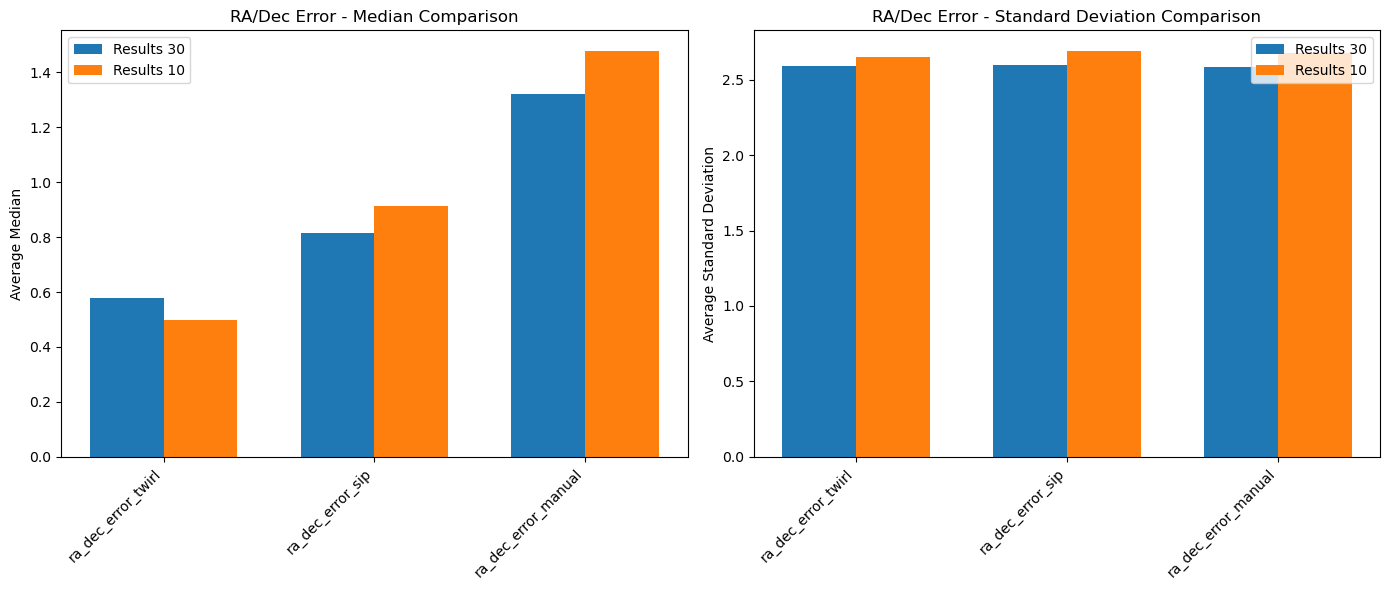

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_averages(results):
    averages = {}
    for error_type in results:
        total_median = 0
        total_std_dev = 0
        num_files = len(results[error_type])
        if num_files == 0:  # Skip if no files
            continue
        for filename in results[error_type]:
            total_median += results[error_type][filename]['median']
            total_std_dev += results[error_type][filename]['std_dev']
        averages[error_type] = {
            'median': total_median / num_files,
            'std_dev': total_std_dev / num_files
        }
    return averages


def plot_comparison_separated(results_30, results_10):
    averages_30 = calculate_averages(results_30)
    averages_10 = calculate_averages(results_10)
    
    # Separate the error types into pixel errors and RA/Dec errors
    pixel_error_types = [error_type for error_type in averages_30 if 'pixel' in error_type]
    ra_dec_error_types = [error_type for error_type in averages_30 if 'ra_dec' in error_type]
    
    # Function to plot comparison
    def plot_error_comparison(error_types, averages_30, averages_10, title):
        indices = np.arange(len(error_types))
        bar_width = 0.35

        median_30 = [averages_30[error_type]['median'] for error_type in error_types]
        std_dev_30 = [averages_30[error_type]['std_dev'] for error_type in error_types]

        median_10 = [averages_10[error_type]['median'] for error_type in error_types]
        std_dev_10 = [averages_10[error_type]['std_dev'] for error_type in error_types]

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
        
        axes[0].bar(indices - bar_width/2, median_30, bar_width, label='Results 30')
        axes[0].bar(indices + bar_width/2, median_10, bar_width, label='Results 10')
        axes[0].set_title(f'{title} - Median Comparison')
        axes[0].set_xticks(indices)
        axes[0].set_xticklabels(error_types, rotation=45, ha="right")
        axes[0].set_ylabel('Average Median')
        axes[0].legend()

        axes[1].bar(indices - bar_width/2, std_dev_30, bar_width, label='Results 30')
        axes[1].bar(indices + bar_width/2, std_dev_10, bar_width, label='Results 10')
        axes[1].set_title(f'{title} - Standard Deviation Comparison')
        axes[1].set_xticks(indices)
        axes[1].set_xticklabels(error_types, rotation=45, ha="right")
        axes[1].set_ylabel('Average Standard Deviation')
        axes[1].legend()

        plt.tight_layout()
        plt.show()
    
    # Plot for pixel errors
    plot_error_comparison(pixel_error_types, averages_30, averages_10, 'Pixel Error')
    
    # Plot for RA/Dec errors
    plot_error_comparison(ra_dec_error_types, averages_30, averages_10, 'RA/Dec Error')

# Example usage
plot_comparison_separated(results_30, results_10)



In [6]:
import pandas as pd

def create_summary_df(results_30, results_10):
    averages_30 = calculate_averages(results_30)
    averages_10 = calculate_averages(results_10)
    
    # Prepare data for DataFrame
    data = []
    for error_type in averages_30:
        row = {
            'Error Type': error_type,
            '30s Median': averages_30[error_type]['median'],
            '30s Std Dev': averages_30[error_type]['std_dev'],
            '10s Median': averages_10[error_type].get('median', 'N/A'),  # Use 'N/A' if error type not present
            '10s Std Dev': averages_10[error_type].get('std_dev', 'N/A'),
        }
        data.append(row)
    
    # Create DataFrame
    df = pd.DataFrame(data)
    return df

# Generate the summary DataFrame
summary_df = create_summary_df(results_30, results_10)

# Display the DataFrame
print(summary_df)


            Error Type  30s Median  30s Std Dev  10s Median  10s Std Dev
0    pixel_error_twirl    1.056479     4.860666    0.929249     5.895559
1   ra_dec_error_twirl    0.578493     2.590622    0.497890     2.652895
2      pixel_error_sip    1.650332     4.888599    1.823344     5.918842
3     ra_dec_error_sip    0.815720     2.598192    0.914262     2.692110
4   pixel_error_manual    2.807548     4.815796    3.279525     5.820705
5  ra_dec_error_manual    1.321982     2.582211    1.478529     2.675270


In [7]:
dfs['vesta-0758-30.fit.csv']

,Unnamed: 0,Star ID,Star X (pix),Star Y (pix),Star Flux,Pixel Error WCS Method Twirl,RA/Dec Error WCS Method Twirl,Pixel Error WCS Method SIP,RA/Dec Error WCS Method SIP,Pixel Error WCS Method Web_Astro,RA/Dec Error WCS Method Web_Astro,Pixel Error WCS Method Manual,RA/Dec Error WCS Method Manual
0,0,0,3260.155910,1608.237148,805.948409,1.553189e-10,0.0,0.496091,0.293703,758361.787716,91338.024112,0.342075,0.194095
1,1,1,2415.751505,1714.133241,634.902659,7.588458e-11,0.0,0.705767,0.416972,758362.644940,91080.341309,1.392674,0.590622
2,2,3,2575.840882,1616.796826,464.254920,4.970131e-11,0.0,0.738130,0.437367,758362.486203,91128.634746,1.215727,0.493677
3,3,4,808.979623,1779.858083,313.050465,2.321467e-11,0.0,1.203481,0.688989,758363.534508,90608.779506,2.665542,1.321251
4,4,5,370.876207,1624.421184,108.961128,1.444002e-11,0.0,2.307583,1.316789,758363.888689,90484.421343,2.990549,1.566734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,132,1235.365656,480.349395,1.434313,2.731443e-11,0.0,2.258370,1.091634,758364.411160,90730.613860,3.552679,1.644819
132,132,133,88.399757,559.411224,1.340048,6.357698e-11,0.0,4.784130,2.600254,758365.807489,90404.462210,4.704355,2.576174
133,133,134,3162.418397,198.859057,1.301160,1.285703e-10,0.0,1.653210,0.731094,758360.853309,91307.206766,2.391565,1.276593
134,134,135,1881.602676,1653.507795,1.289174,2.542623e-11,0.0,0.436740,0.258185,758363.056891,90920.767204,2.052247,0.907697



## Analysis Summary

### 1. Consistency Across Runs
The standard deviation figures across different methods and metrics show remarkable consistency. This uniformity suggests that the variation inherent in the methods, likely due to their shared use of DAOStarFinder, does not significantly impact the reliability of results from one run to the next.

### 2. Median Error Performance
- **Twirl Method**: Exhibits the lowest median errors for both pixel and RA/Dec errors in both exposure durations. This method demonstrates not only superior accuracy but also an ability to maintain performance with reduced exposure time, making it highly adaptable and reliable for various observational needs.
- **SIP Method**: Despite accounting for distortion, SIP surprisingly underperforms relative to the Twirl method, which does not explicitly correct for this factor. The SIP method's reduced performance with shorter exposures suggests potential implementation issues or other limitations that merit further investigation. Nonetheless, it shows a preference for longer exposure times, indicating its potential strength in scenarios where longer data capture is feasible.
- **Manual Method**: Designed to address specific errors from Astropy's default settings, the Manual method shows the highest median errors. Its approach of forcing an offset seems to introduce significant inaccuracies, although, like SIP, it sees some improvement with longer exposures.

## Recommendations

Based on the analysis, the **Twirl method** stands out as the most effective WCS correction approach under the tested conditions, due to its consistently low median errors and its robustness across varying exposure times. For practitioners and researchers in astronomy, prioritizing Twirl for WCS corrections, especially in time-constrained observational settings, is advisable.

The **SIP method**, while not as universally effective as Twirl, may still be preferable in situations where longer exposures are possible and distortion needs to be accounted for, pending further refinement to address its current shortcomings.

The **Manual method**, given its performance, might be less desirable for precision work but could serve as a useful fallback or point of comparison for evaluating other methods' effectiveness.

